In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
import itertools
from arch import arch_model
from scipy.stats import shapiro
from scipy.stats import probplot
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import datetime 
import matplotlib.pyplot as plt

In [2]:
def scrap(data, start: datetime.date):
    result = yf.download(data,start)['Adj Close']
    return result 

In [3]:
stock = scrap('TDG','2015-1-1')
stock

[*********************100%***********************]  1 of 1 completed


Date
2015-01-02    144.578583
2015-01-05    143.628128
2015-01-06    143.993683
2015-01-07    145.901901
2015-01-08    148.343826
                 ...    
2023-09-07    887.229980
2023-09-08    871.890015
2023-09-11    877.820007
2023-09-12    872.059998
2023-09-13    867.150024
Name: Adj Close, Length: 2189, dtype: float64

<Axes: xlabel='Date'>

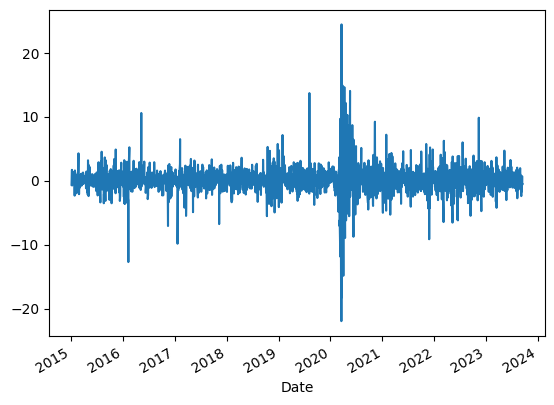

In [4]:
stock_return = np.log(stock/stock.shift(1))
stock_return = stock_return.dropna()
stock_porcentual_change = 100*(stock/stock.shift(1)-1)
stock_porcentual_change = stock_porcentual_change.dropna()
stock_porcentual_change.plot()

<Axes: title={'center': ' Closing Price 2013-2018'}, xlabel='Date'>

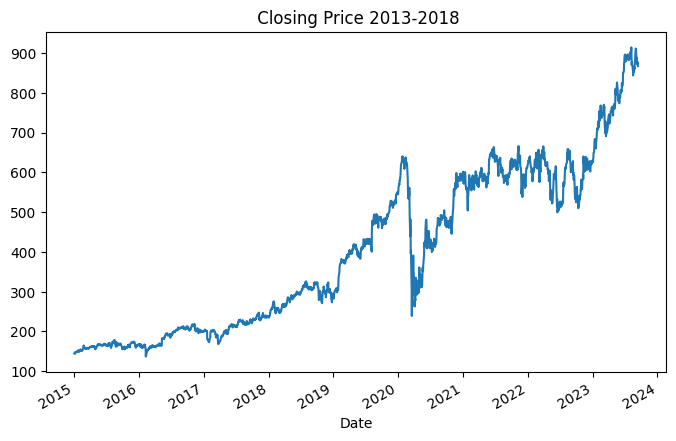

In [5]:
stock.plot(figsize=(8, 5), title=' Closing Price 2013-2018')
# df['close'].plot(figsize=(10, 5), title=f'{stock} Closing Price 2013-2018')

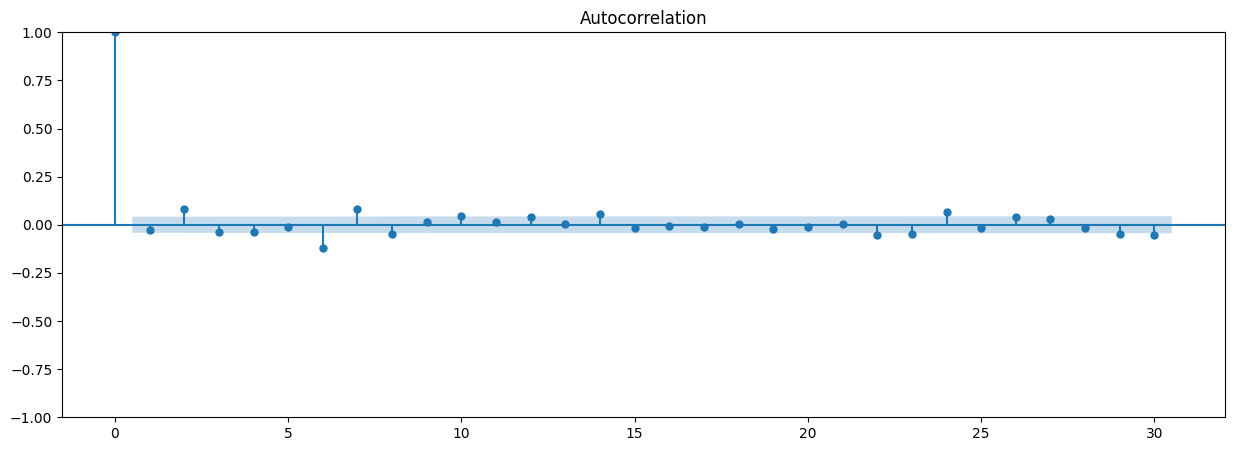

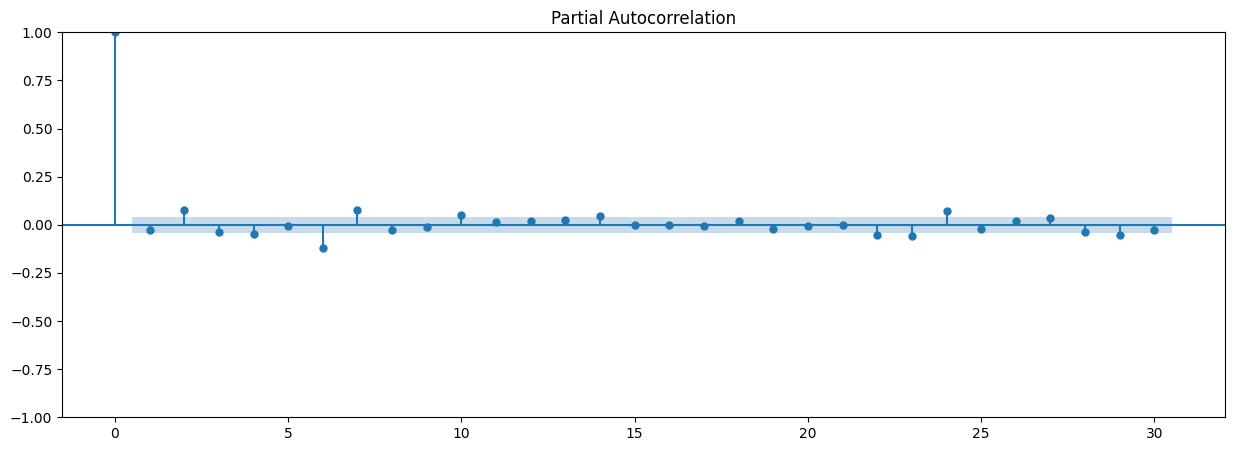

In [6]:
acf = plot_acf(stock_return, lags=30)
pacf = plot_pacf(stock_return, lags=30, method='ywm')
acf.set_figheight(5)
acf.set_figwidth(15)
pacf.set_figheight(5)
pacf.set_figwidth(15)
# plt.show()

In [7]:
ljung_res = acorr_ljungbox(stock_return,lags= 40, boxpierce=True)

# ljung_res.columns
print(f"Ljung-Box p-values: {ljung_res['lb_pvalue']}")
print(f"Box-Pierce p-values: {ljung_res['bp_pvalue']}")
# print(f'\nBox-Pierce p-values: {ljung_res[3]}')

Ljung-Box p-values: 1     1.854506e-01
2     3.787446e-04
3     2.580453e-04
4     1.565350e-04
5     3.740773e-04
6     2.940002e-10
7     1.291176e-12
8     4.116647e-13
9     1.141105e-12
10    4.026651e-13
11    9.692467e-13
12    4.593128e-13
13    1.261527e-12
14    1.268653e-13
15    2.759125e-13
16    6.941377e-13
17    1.553219e-12
18    3.630174e-12
19    5.016664e-12
20    9.722626e-12
21    2.124625e-11
22    3.655545e-12
23    1.274760e-12
24    4.503941e-14
25    8.304007e-14
26    4.894459e-14
27    5.044250e-14
28    8.266281e-14
29    2.034165e-14
30    4.012500e-15
31    8.634541e-15
32    9.931359e-15
33    1.715137e-14
34    3.508362e-14
35    6.349487e-14
36    4.432078e-14
37    7.606414e-14
38    8.474165e-14
39    4.326232e-14
40    7.800798e-14
Name: lb_pvalue, dtype: float64
Box-Pierce p-values: 1     1.857520e-01
2     3.840804e-04
3     2.624648e-04
4     1.598050e-04
5     3.816764e-04
6     3.177779e-10
7     1.434307e-12
8     4.618038e-13
9     1.279039e

In [8]:
def ts_plot(residuals, stan_residuals, lags=30):
    residuals.plot(title='GARCH Residuals', figsize=(7, 5))
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].set_title('GARCH Standardized Residuals KDE')
    ax[1].set_title('GARCH Standardized Resduals Probability Plot')    
    residuals.plot(kind='kde', ax=ax[0])
    probplot(stan_residuals, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(stan_residuals, lags=lags)
    pacf = plot_pacf(stan_residuals, lags=lags, method = 'ywm')
    acf.suptitle('GARCH Model Standardized Residual Autocorrelation', fontsize=20)
    acf.set_figheight(5)
    acf.set_figwidth(15)
    pacf.set_figheight(5)
    pacf.set_figwidth(15)
    plt.show()

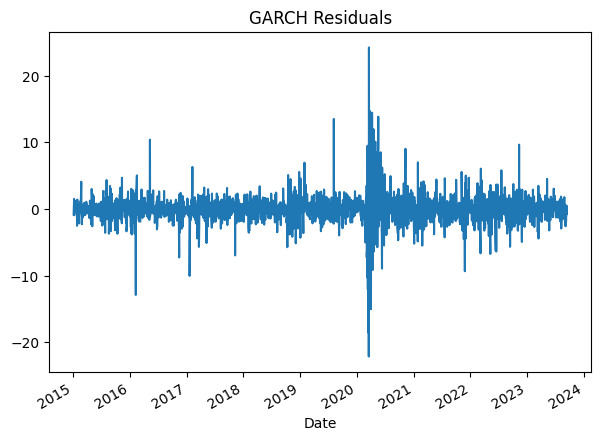

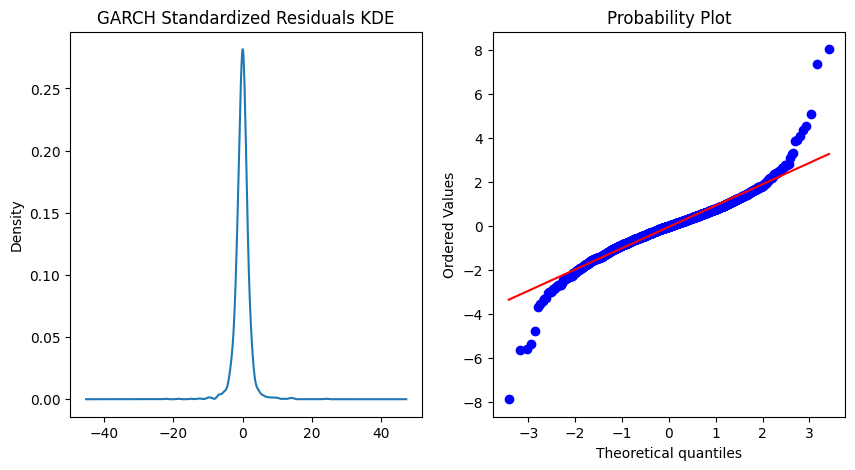

C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


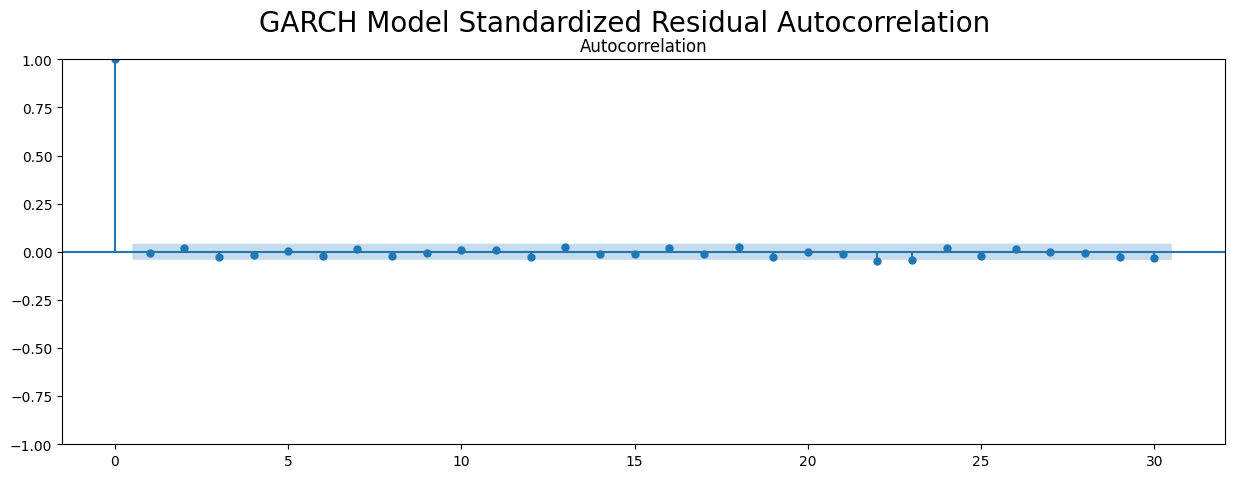

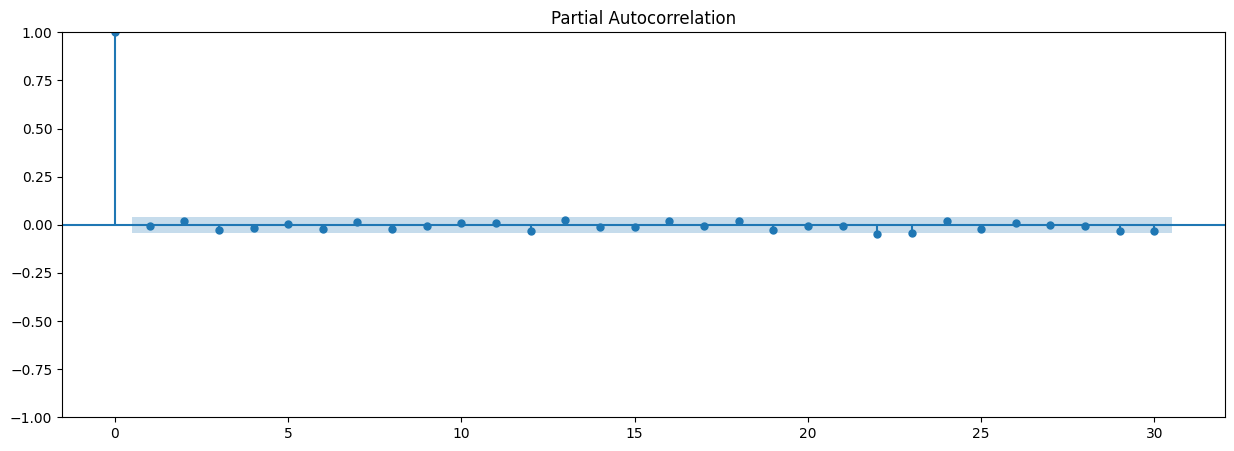

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4336.66
Distribution:                  Normal   AIC:                           8681.32
Method:            Maximum Likelihood   BIC:                           8704.09
                                        No. Observations:                 2188
Date:                Thu, Sep 14 2023   Df Residuals:                     2187
Time:                        10:12:27   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1570  4.182e-02      3.754  1.742e-04 [7.501e-02,  0.239]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2862      0.114      2.515  1.189e-02 [6.321e-02,  0.509]
alpha[1]       0.1384  4.468e-02      3.098  1.950e-03 [5.084e-02,  0.226]
beta[1]        0.7861  6.026e-02     13.045  6.766e-39   [  0.668,  0.904]
==========================================================================

Covariance estimator: robust
"""

In [9]:
garch = arch_model(stock_porcentual_change, vol='GARCH', p=1, q=1, dist='normal')
fgarch = garch.fit(disp='off') 
resid = fgarch.resid
st_resid = np.divide(resid, fgarch.conditional_volatility)
ts_plot(resid, st_resid)
fgarch.summary()


In [10]:
arch_test = het_arch(resid, nlags=30)
shapiro_test = shapiro(st_resid)

print(f'Lagrange mulitplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[3]}')
print(f'Shapiro-Wilks p-value: {shapiro_test[1]}')

Lagrange mulitplier p-value: 1.4352342935420632e-119
F test p-value: 7.51809613984701e-145
Shapiro-Wilks p-value: 1.222983690649745e-28


In [11]:
# def gridsearch(data, p_rng, q_rng):
#     top_score, top_results = float('inf'), None
#     top_models = []
#     for p in p_rng:
#         for q in q_rng:
#             try:
#                 model = arch_model(data, vol='GARCH', p=p, q=q, dist='normal')
#                 model_fit = model.fit(disp='off')
#                 resid = model_fit.resid
#                 st_resid = np.divide(resid, model_fit.conditional_volatility)
#                 results = evaluate_model(resid, st_resid)
#                 results['AIC'] = model_fit.aic
#                 results['params']['p'] = p
#                 results['params']['q'] = q
#                 if results['AIC'] < top_score: 
#                     top_score = results['AIC']
#                     top_results = results
#                 elif results['LM_pvalue'][1] is False:
#                     top_models.append(results)
#             except:
#                 continue
#     top_models.append(top_results)
#     return top_models

In [12]:
def evaluate_model(residuals, st_residuals, lags=50):
    results = {
        'LM_pvalue': None,
        'F_pvalue': None,
        'SW_pvalue': None,
        'AIC': None,
        'params': {'p': None, 'q': None}
    }
    arch_test = het_arch(residuals, nlags=lags)
    shap_test = shapiro(st_residuals)
    # We want falsey values for each of these hypothesis tests
    results['LM_pvalue'] = [arch_test[1], arch_test[1] < .05]
    results['F_pvalue'] = [arch_test[3], arch_test[3] < .05]
    results['SW_pvalue'] = [shap_test[1], shap_test[1] < .05]
    return results

In [13]:
# p_rng = range(0,30)
# q_rng = range(0,40)
# # df['dif_pct_change'] = df['pct_change'].diff()
# top_models = gridsearch(stock_porcentual_change, p_rng, q_rng)
# print(top_models)

In [14]:
from joblib import Parallel, delayed

def gridsearch(data, p_rng, q_rng, max_models=50):
    top_score, top_results = float('inf'), None
    top_models = []
    num_models = 0
    for p in p_rng:
        for q in q_rng:
            try:
                model = arch_model(data, vol='GARCH', p=p, q=q, dist='normal')
                model_fit = model.fit(disp='off')
                resid = model_fit.resid
                st_resid = np.divide(resid, model_fit.conditional_volatility)
                results = evaluate_model(resid, st_resid)
                results['AIC'] = model_fit.aic
                results['params']['p'] = p
                results['params']['q'] = q
                if results['AIC'] < top_score: 
                    top_score = results['AIC']
                    top_results = results
                elif results['LM_pvalue'][1] is False:
                    top_models.append(results)
                    num_models += 1
                    if num_models >= max_models:
                        break
            except:
                continue
        if num_models >= max_models:
            break
    top_models.append(top_results)
    return top_models

def parallel_gridsearch(data, p_rng, q_rng, max_models=50, n_jobs=4):
    results = Parallel(n_jobs=n_jobs)(
        delayed(gridsearch)(data, p_rng, q_rng, max_models) for _ in range(n_jobs)
    )
    # Combine the results from each job and sort by AIC score
    all_models = [model for sublist in results for model in sublist]
    all_models.sort(key=lambda x: x['AIC'])
    return all_models[:max_models]


In [15]:
p_rng = range(0, 30)
q_rng = range(0, 40)
top_models = parallel_gridsearch(stock_porcentual_change, p_rng, q_rng)
print(top_models)
